In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1.Frequency Domain Filters

## 1.Gaussian Low Pass Filter and High Pass Filter

In [15]:
img=cv2.imread("\Users\venna phaneendra\Desktop\Engineering\7th Semester\Image Processing",-1)

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \UXXXXXXXX escape (<ipython-input-15-0d4b1d667062>, line 1)

In [12]:
def gaussian_low_pass_filter(m,n,sigma):
    center_x,center_y=m//2,n//2
    kernel=np.zeros((m,n))
    for i in range(kernel.shape[0]):
        for j in range(kernel.shape[1]):
            x,y=i-center_x,j-center_y
            kernel[i,j]=(1/(2*np.pi*np.square(sigma)))*np.exp(-((np.square(x)+np.square(y))/(2*np.square(sigma))))
    return kernel

In [13]:
low_kernel=gaussian_low_pass_filter(img.shape[0],img.shape[1],4)
high_kernel=1-gaussian_low_pass_filter(3,3,1)

AttributeError: 'NoneType' object has no attribute 'shape'

In [5]:
res1,res2 = cv2.filter2D(img,-1,low_kernel), cv2.filter2D(img,-1,high_kernel)

NameError: name 'low_kernel' is not defined

In [6]:
plt.figure(figsize=(10,10))
plt.imshow(np.hstack([img,res1,res2]),cmap="gray")
plt.title("Original vs After Gaussian LPF vs After Gaussian HPF")

NameError: name 'res1' is not defined

<Figure size 720x720 with 0 Axes>

## 2. Butterworth low filter and high filter

In [7]:
def butterworth_high_filter(m,n,D0,N):
    kernel=np.zeros((m,n))
    for i in range(kernel.shape[0]):
        for j in range(kernel.shape[1]):
            kernel[i,j]=1/np.power((1+D0/(np.square(i)+np.square(j))),2*N)
    return kernel

In [8]:
high_kernel=butterworth_high_filter(5,5,50,1)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in int_scalars
  """


In [9]:
low_kernel=1-butterworth_high_filter(5,5,1,1)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in int_scalars
  """


In [10]:
res1=cv2.filter2D(img,-1,high_kernel)
res2=cv2.filter2D(img,-1,low_kernel)

Text(0.5, 1.0, 'Original vs BHPF v/s BLPF')

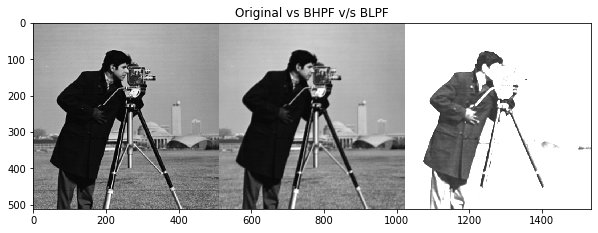

In [11]:
plt.figure(figsize=(10,10))
plt.imshow(np.hstack([img,res1,res2]), cmap="gray")
plt.title("Original vs BHPF v/s BLPF")

## 2.Dilation

In [12]:
img=cv2.imread("square-circle.jpg",0)

### Square structuring element

In [13]:
kernel=cv2.getStructuringElement(cv2.MORPH_RECT,(10,10))

In [14]:
img1=cv2.dilate(img,kernel,iterations=1)

Text(0.5, 1.0, 'Original vs Square Structuring element of dim 10*10 Dilation')

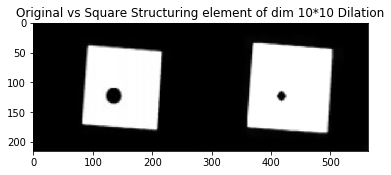

In [15]:
plt.imshow(np.hstack([img,img1]),cmap="gray")
plt.title("Original vs Square Structuring element of dim 10*10 Dilation")

### Circle Structuring element

In [16]:
kernel=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(10,10))

In [17]:
img2=cv2.dilate(img,kernel,iterations=1)

Text(0.5, 1.0, 'Original vs Circle Structuring element of dim 10*10 Dilation')

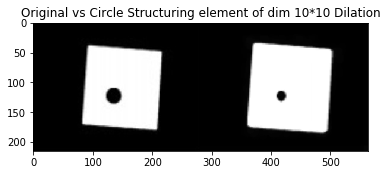

In [18]:
plt.imshow(np.hstack([img,img2]),cmap="gray")
plt.title("Original vs Circle Structuring element of dim 10*10 Dilation")

In [19]:
cv2.imwrite("square-circle-dilate-1.png",img1)
cv2.imwrite("square-circle-dilate-2.png",img2)

True

## 3. Erotion

In [20]:
img=cv2.imread('circle-square.jpg')

### Square structuring element

In [21]:
kernel=cv2.getStructuringElement(cv2.MORPH_RECT,(10,10))

In [22]:
img1=cv2.erode(img,kernel,iterations=1)

Text(0.5, 1.0, 'Original vs Square Structuring element of dim 10*10 Erosion')

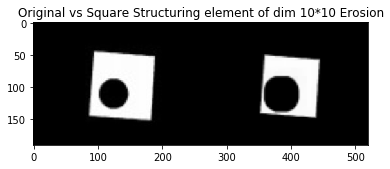

In [23]:
plt.imshow(np.hstack([img,img1]),cmap="gray")
plt.title("Original vs Square Structuring element of dim 10*10 Erosion")

### Circle Structuring element

In [24]:
kernel=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(10,10))

In [25]:
img2=cv2.erode(img,kernel,iterations=1)

Text(0.5, 1.0, 'Original vs Circle Structuring element of dim 10*10 Erosion')

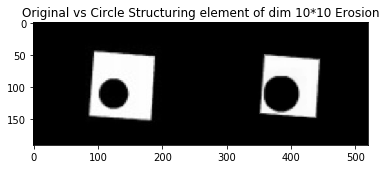

In [26]:
plt.imshow(np.hstack([img,img2]),cmap="gray")
plt.title("Original vs Circle Structuring element of dim 10*10 Erosion")

In [27]:
cv2.imwrite("circle-square-erode-1.png",img1)
cv2.imwrite("circle-square-erode-2.png",img2)

True